> Dana jest tablica zawierająca $ n $ liczb z zakresu $ [0, n^2-1] $. Napisz algorytm, który posortuje taką tablicę w czasie $ O(n) $.

### Omówienie algorytmu

###### Wstępne rozważania:

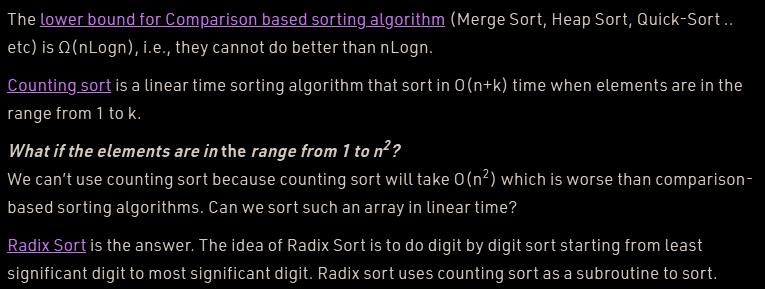
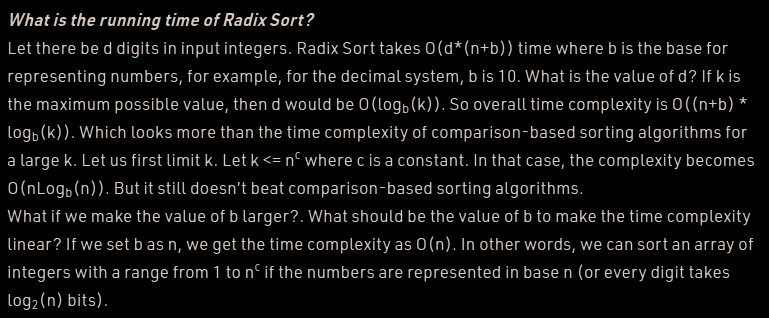

Powyższy opis algorytmu Radix Sort zaczerpnięty ze strony internetowej:
##### https://www.geeksforgeeks.org/radix-sort/
Pokazuje idealnie zastosowanie algorytmu Radix Sort. Ponieważ jego dokładna złożoność czasowa to $ O(d \cdot (n + b)) = O(log_b(k) \cdot (n + b)) $, gdzie $ d = log_b(k) $ - maksymalna liczba znaków, jakie są wymagane do reprezentowania sortownych wartości w systemie liczbowym o podstawie $ b $, $ b $ jest podstawą systemu liczbowego, $ k $ - największą wartością w sortowanym zakresie, $ n $ - dlugością sortowanej tablicy.

Zauważmy, że abyśmy osiągnęli złożoność liniową, musimy mieć pewność, że liczba cyfr sortowanych przez nas liczb nie zależy od $ n $ (tzn. $ d \neq n $, jest stała), ponieważ, w przeciwnym wypadku, byśmy uzyskali złożoność większą niż $ O(n) $. Wiemy, że liczby należą do zakresu $ [0, n^2 - 1] $ oraz, że mamy $ n $ liczb, więc możemy zauważyć, że największą wartością moze być $ k = n^2 - 1 $. Ponieważ pragniemy aby $ d = log_b(k) = const. $ oraz wiemy, że w najgorszym przypadku $ k = n^2 - 1 $, za podstawę systemu liczbowego najlepiej przyjąć $ n $. Wynika to z faktu, iż wówczas: $ d = log_n(k) = log_n(n^2 - 1) < log_n(n^2) = 2log_n(n) = 2 = const. $. Zatem całkowita złożoność obliczeniowa wyniesie wówczas: $ O(2 \cdot (n + n)) = O(4n) = O(n) $.

### Implementacja algorytmu

In [1]:
def radix_sort(arr, base=10):
    if arr:
        # Store the greatest value
        max_val = _max(arr)
        
        digit_place = 1
        while max_val >= digit_place:
            _counting_sort(arr, base, digit_place)
            digit_place *= base


def _counting_sort(arr, base, digit_place):
    # Allocate memory for required temporary arrays
    counts = [0] * base
    temp = [None] * len(arr)
    # Count digits repetitions
    for val in arr:
        digit = (val // digit_place) % base
        counts[digit] += 1
    # Modify the counts array to indicate how many digits are not greater than the current one
    for i in range(1, base):
        counts[i] += counts[i-1]
    # Rewrite values to the temp sorted array
    for i in range(len(arr)-1, -1, -1):
        digit = (arr[i] // digit_place) % base
        counts[digit] -= 1
        temp[counts[digit]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(temp)):
        arr[i] = temp[i]
        
        
def _max(arr):
    if arr:
        max_val = arr[0]
        for i in range(1, len(arr)):
            if arr[i] > max_val:
                max_val = arr[i]
        return max_val
    else:
        return None

###### Kilka testów

In [2]:
import random

n = 100
rand_lst = [random.randint(0, n**2 - 1) for _ in range(n)]
print('\nInput:', rand_lst)
sorted_lst = sorted(rand_lst)
radix_sort(rand_lst, n)
print('\nExpected:', sorted_lst)
print('\nResult:', rand_lst)
print(f'\nAn algorithm is {"CORRECT" if sorted_lst == rand_lst else "WRONG"}')


Input: [6403, 2967, 1215, 5396, 6330, 887, 2484, 4176, 9144, 5725, 6554, 1166, 8807, 5109, 9955, 1323, 1199, 2465, 7256, 8224, 2740, 9853, 948, 8074, 6322, 9838, 5628, 7874, 193, 5044, 3989, 6202, 2690, 6839, 2979, 8078, 5549, 7976, 6623, 3365, 8217, 6552, 5144, 7381, 4702, 5296, 9135, 8313, 529, 2661, 9732, 480, 7910, 5840, 2441, 7117, 9819, 5432, 1461, 7103, 1354, 1512, 6038, 9175, 524, 9157, 5619, 2380, 2035, 8954, 3864, 3202, 3841, 7681, 4147, 7019, 3013, 4853, 2097, 6813, 9353, 9601, 9084, 14, 9379, 8263, 6992, 4313, 2827, 6607, 6312, 4036, 9535, 1433, 1913, 8974, 487, 8808, 2227, 1987]

Expected: [14, 193, 480, 487, 524, 529, 887, 948, 1166, 1199, 1215, 1323, 1354, 1433, 1461, 1512, 1913, 1987, 2035, 2097, 2227, 2380, 2441, 2465, 2484, 2661, 2690, 2740, 2827, 2967, 2979, 3013, 3202, 3365, 3841, 3864, 3989, 4036, 4147, 4176, 4313, 4702, 4853, 5044, 5109, 5144, 5296, 5396, 5432, 5549, 5619, 5628, 5725, 5840, 6038, 6202, 6312, 6322, 6330, 6403, 6552, 6554, 6607, 6623, 6813, 6839, 6